In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras
import pandas as pd
import numpy as np


from tensorflow.keras import Sequential 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation

In [2]:
#loading the data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

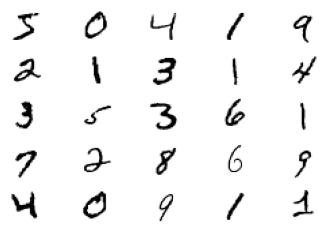

In [3]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [4]:
#60.000 images of numbers each of them with a 28*28 matrix that represents the pixels
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
## Reshaping your data_frame
xtrain=pd.DataFrame(xtrain.reshape(60000,784))

In [7]:
xtest=pd.DataFrame(xtest.reshape(10000,784))

In [8]:
ytrain=to_categorical(ytrain, num_classes=10)

In [9]:
ytrain.shape

(60000, 10)

In [10]:
ytest=to_categorical(ytest, num_classes=10)

In [11]:
ytest.shape

(10000, 10)

In [12]:
m = Sequential([
    Dense(100,input_shape=(784,)),    
    Activation('relu'),
    Dense(10),
    Activation('softmax')    
])

In [13]:
m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history=m.fit(xtrain,ytrain,epochs=20,batch_size=500,verbose=1,validation_split=0.2,)

Epoch 1/20
96/96 [==============================] - 0s 5ms/step - loss: 10.6476 - accuracy: 0.7977 - val_loss: 2.3710 - val_accuracy: 0.8999
Epoch 2/20
96/96 [==============================] - 0s 3ms/step - loss: 1.6649 - accuracy: 0.9043 - val_loss: 1.1862 - val_accuracy: 0.9168
Epoch 3/20
96/96 [==============================] - 0s 4ms/step - loss: 0.7727 - accuracy: 0.9207 - val_loss: 0.7735 - val_accuracy: 0.9176
Epoch 4/20
96/96 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.9362 - val_loss: 0.5941 - val_accuracy: 0.9341
Epoch 5/20
96/96 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.9482 - val_loss: 0.5583 - val_accuracy: 0.9347
Epoch 6/20
96/96 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.9557 - val_loss: 0.5189 - val_accuracy: 0.9344
Epoch 7/20
96/96 [==============================] - 0s 3ms/step - loss: 0.1937 - accuracy: 0.9618 - val_loss: 0.4554 - val_accuracy: 0.9446
Epoch 8/20
96/96 [=

In [16]:
score = m.evaluate(xtest, ytest, batch_size=500)
print(score)

20/20 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.9548
[0.5091565251350403, 0.954800009727478]


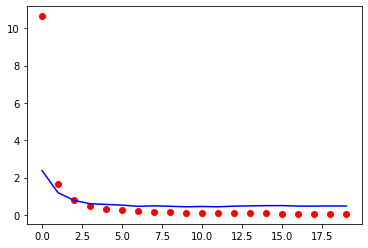

In [17]:
plt.plot(history.history['loss'],'bo', label='loss',c='red')
plt.plot(history.history['val_loss'],'b', label='val_loss')

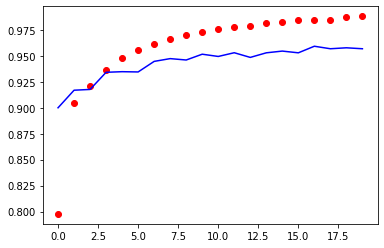

In [18]:
plt.plot(figsize=(20, 20))
plt.plot(history.history['accuracy'],'bo',label='accuracy',c='red')
plt.plot(history.history['val_accuracy'],'b',label='val_accuracy')

***Trying out different models***

In [19]:
m1 = Sequential([
    Dense(100,input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10),
    Activation('softmax')    
])

In [20]:
m2 = Sequential([
    Dense(800, input_shape=(784,)),
    Activation('relu'),
    Dense(400),
    Activation('relu'),
    Dense(200),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [21]:

m3 = Sequential([
    Dense(50, input_shape=(784,)),
    Activation('relu'),
    Dense(25),
    Activation('relu'),
    Dense(25),
    Activation('relu'),
    Dense(25),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [22]:
m4= Sequential([
    Dense(100, input_shape=(784,)),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [23]:
m5= Sequential([
    Dense(100, input_shape=(784,)),
    Dropout(.2),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [24]:
m6= Sequential([
    Dense(200, input_shape=(784,)),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(50),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [25]:
m7= Sequential([
    Dense(100, input_shape=(784,)),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [26]:
m8= Sequential([
    Dense(100, input_shape=(784,)),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [27]:
m9= Sequential([
    Dense(50, input_shape=(784,)),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(50),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(50),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [28]:
m10= Sequential([
    Dense(100, input_shape=(784,)),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),0.9
    Activation('relu'),
    BatchNormalization(),
    Dense(100),
    Dropout(.5),
    Activation('relu'),
    BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [29]:
#Function to run the model
def mod(m):
    K.clear_session()
    callback = EarlyStopping(monitor='val_loss', patience=3)
    m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    history=m.fit(xtrain,ytrain,epochs=100,batch_size=500,verbose=1,callbacks=[callback],validation_split=0.2,)
    Test_score= m.evaluate(xtest, ytest, batch_size=500)
    m.summary()
    plt.plot(history.history['accuracy'],'bo',label='accuracy',c='red')
    plt.plot(history.history['val_accuracy'],'b',label='val_accuracy')

In [30]:
def mod2(m):
    K.clear_session()
    callback = EarlyStopping(monitor='val_loss', patience=3)
    m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    history=m.fit(xtrain,ytrain,epochs=50,batch_size=500,verbose=1,callbacks=[callback],validation_split=0.2,)
    Test_score= m.evaluate(xtest, ytest, batch_size=500)
    m.summary()
    plt.plot(history.history['accuracy'],'bo',label='accuracy',c='red')
    plt.plot(history.history['val_accuracy'],'b',label='val_accuracy')

In [43]:
def mod3(m):
    K.clear_session()
    callback = EarlyStopping(monitor='val_loss', patience=5)
    m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    history=m.fit(xtrain,ytrain,epochs=50,batch_size=500,verbose=1,callbacks=[callback],validation_split=0.2,)
    Test_score= m.evaluate(xtest, ytest, batch_size=500)
    m.summary()
    plt.plot(history.history['accuracy'],'bo',label='accuracy',c='red')
    plt.plot(history.history['val_accuracy'],'b',label='val_accuracy')

Epoch 1/100
96/96 [==============================] - 1s 6ms/step - loss: 0.7492 - accuracy: 0.7710 - val_loss: 0.2834 - val_accuracy: 0.9198
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8854 - val_loss: 0.2136 - val_accuracy: 0.9392
Epoch 3/100
96/96 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.9030 - val_loss: 0.1868 - val_accuracy: 0.9463
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.9119 - val_loss: 0.1708 - val_accuracy: 0.9518
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2679 - accuracy: 0.9196 - val_loss: 0.1576 - val_accuracy: 0.9552
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2537 - accuracy: 0.9241 - val_loss: 0.1520 - val_accuracy: 0.9567
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2394 - accuracy: 0.9275 - val_loss: 0.1461 - val_accuracy: 0.9568
Epoch 8/100
9

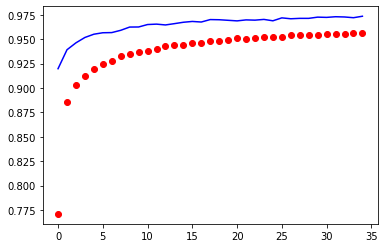

In [31]:
mod(m1)

Epoch 1/100
96/96 [==============================] - 6s 65ms/step - loss: 11.3439 - accuracy: 0.7633 - val_loss: 0.3547 - val_accuracy: 0.9171
Epoch 2/100
96/96 [==============================] - 4s 37ms/step - loss: 0.3606 - accuracy: 0.9172 - val_loss: 0.2511 - val_accuracy: 0.9353
Epoch 3/100
96/96 [==============================] - 6s 67ms/step - loss: 0.2001 - accuracy: 0.9485 - val_loss: 0.1520 - val_accuracy: 0.9613
Epoch 4/100
96/96 [==============================] - 4s 37ms/step - loss: 0.1515 - accuracy: 0.9600 - val_loss: 0.1494 - val_accuracy: 0.9626
Epoch 5/100
96/96 [==============================] - 6s 65ms/step - loss: 0.1097 - accuracy: 0.9707 - val_loss: 0.2090 - val_accuracy: 0.9544
Epoch 6/100
96/96 [==============================] - 7s 74ms/step - loss: 0.0933 - accuracy: 0.9751 - val_loss: 0.1486 - val_accuracy: 0.9653
Epoch 7/100
96/96 [==============================] - 4s 38ms/step - loss: 0.0752 - accuracy: 0.9801 - val_loss: 0.1972 - val_accuracy: 0.9607
Epoch

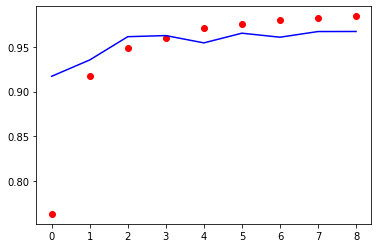

In [32]:
mod(m2)

Epoch 1/100
96/96 [==============================] - 1s 10ms/step - loss: 4.7603 - accuracy: 0.5485 - val_loss: 0.8009 - val_accuracy: 0.7743
Epoch 2/100
96/96 [==============================] - 1s 7ms/step - loss: 0.6755 - accuracy: 0.8166 - val_loss: 0.4940 - val_accuracy: 0.8598
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.4197 - accuracy: 0.8864 - val_loss: 0.3919 - val_accuracy: 0.8990
Epoch 4/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3094 - accuracy: 0.9133 - val_loss: 0.2859 - val_accuracy: 0.9227
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2494 - accuracy: 0.9308 - val_loss: 0.2753 - val_accuracy: 0.9256
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2099 - accuracy: 0.9408 - val_loss: 0.2484 - val_accuracy: 0.9330
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.9483 - val_loss: 0.2314 - val_accuracy: 0.9372
Epoch 8/100


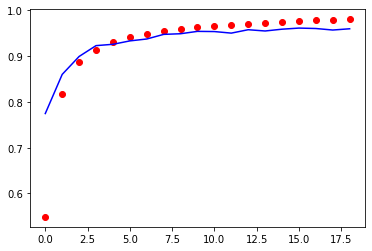

In [33]:
mod(m3)

Epoch 1/100
96/96 [==============================] - 2s 16ms/step - loss: 5.0158 - accuracy: 0.7333 - val_loss: 0.8605 - val_accuracy: 0.8625
Epoch 2/100
96/96 [==============================] - 1s 13ms/step - loss: 0.6157 - accuracy: 0.8881 - val_loss: 0.4364 - val_accuracy: 0.9122
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.3469 - accuracy: 0.9234 - val_loss: 0.3717 - val_accuracy: 0.9187
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2284 - accuracy: 0.9444 - val_loss: 0.2726 - val_accuracy: 0.9403
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 0.1717 - accuracy: 0.9551 - val_loss: 0.3027 - val_accuracy: 0.9361
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 0.1430 - accuracy: 0.9626 - val_loss: 0.2523 - val_accuracy: 0.9444
Epoch 7/100
96/96 [==============================] - 1s 12ms/step - loss: 0.1134 - accuracy: 0.9687 - val_loss: 0.2174 - val_accuracy: 0.9534
Epoch 8/10

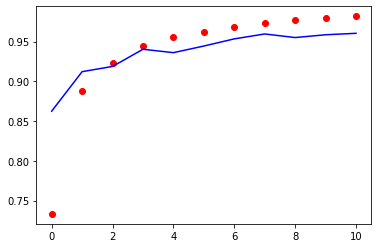

In [34]:
mod(m4)

Epoch 1/100
96/96 [==============================] - 2s 23ms/step - loss: 1.0999 - accuracy: 0.6500 - val_loss: 0.3317 - val_accuracy: 0.9038
Epoch 2/100
96/96 [==============================] - 2s 21ms/step - loss: 0.4306 - accuracy: 0.8803 - val_loss: 0.1972 - val_accuracy: 0.9422
Epoch 3/100
96/96 [==============================] - 2s 20ms/step - loss: 0.3043 - accuracy: 0.9163 - val_loss: 0.1528 - val_accuracy: 0.9567
Epoch 4/100
96/96 [==============================] - 2s 25ms/step - loss: 0.2469 - accuracy: 0.9340 - val_loss: 0.1367 - val_accuracy: 0.9603
Epoch 5/100
96/96 [==============================] - 1s 14ms/step - loss: 0.2112 - accuracy: 0.9423 - val_loss: 0.1333 - val_accuracy: 0.9626
Epoch 6/100
96/96 [==============================] - 1s 12ms/step - loss: 0.1876 - accuracy: 0.9494 - val_loss: 0.1219 - val_accuracy: 0.9670
Epoch 7/100
96/96 [==============================] - 2s 16ms/step - loss: 0.1728 - accuracy: 0.9544 - val_loss: 0.1165 - val_accuracy: 0.9686
Epoch 

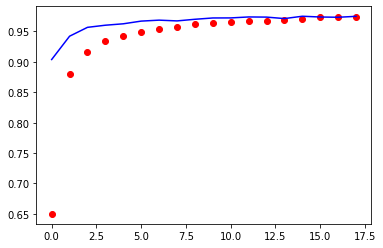

In [35]:
mod(m5)

Epoch 1/100
96/96 [==============================] - 3s 32ms/step - loss: 1.3638 - accuracy: 0.5558 - val_loss: 0.3618 - val_accuracy: 0.8963
Epoch 2/100
96/96 [==============================] - 3s 27ms/step - loss: 0.6263 - accuracy: 0.8282 - val_loss: 0.2255 - val_accuracy: 0.9377
Epoch 3/100
96/96 [==============================] - 3s 28ms/step - loss: 0.4382 - accuracy: 0.8859 - val_loss: 0.1825 - val_accuracy: 0.9489
Epoch 4/100
96/96 [==============================] - 3s 27ms/step - loss: 0.3556 - accuracy: 0.9093 - val_loss: 0.1582 - val_accuracy: 0.9562
Epoch 5/100
96/96 [==============================] - 3s 29ms/step - loss: 0.3052 - accuracy: 0.9227 - val_loss: 0.1380 - val_accuracy: 0.9624
Epoch 6/100
96/96 [==============================] - 3s 27ms/step - loss: 0.2787 - accuracy: 0.9299 - val_loss: 0.1297 - val_accuracy: 0.9644
Epoch 7/100
96/96 [==============================] - 3s 30ms/step - loss: 0.2516 - accuracy: 0.9382 - val_loss: 0.1213 - val_accuracy: 0.9663
Epoch 

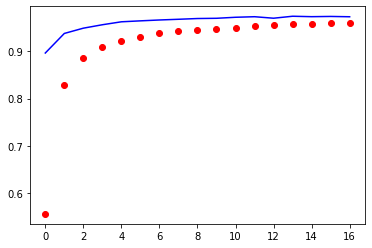

In [36]:
mod(m6)

Epoch 1/100
96/96 [==============================] - 1s 8ms/step - loss: 0.9834 - accuracy: 0.6909 - val_loss: 0.2978 - val_accuracy: 0.9127
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 0.4626 - accuracy: 0.8667 - val_loss: 0.2033 - val_accuracy: 0.9415
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.3611 - accuracy: 0.8954 - val_loss: 0.1814 - val_accuracy: 0.9466
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 0.3180 - accuracy: 0.9088 - val_loss: 0.1688 - val_accuracy: 0.9523
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2865 - accuracy: 0.9184 - val_loss: 0.1552 - val_accuracy: 0.9563
Epoch 6/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2690 - accuracy: 0.9235 - val_loss: 0.1423 - val_accuracy: 0.9601
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.2508 - accuracy: 0.9283 - val_loss: 0.1461 - val_accuracy: 0.9575
Epoch 8/100
9

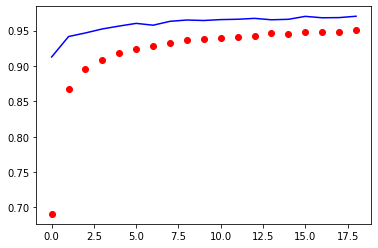

In [37]:
mod(m7)

Epoch 1/100
96/96 [==============================] - 1s 12ms/step - loss: 1.8470 - accuracy: 0.3741 - val_loss: 0.6488 - val_accuracy: 0.8282
Epoch 2/100
96/96 [==============================] - 1s 9ms/step - loss: 0.8745 - accuracy: 0.7249 - val_loss: 0.3559 - val_accuracy: 0.9007
Epoch 3/100
96/96 [==============================] - 1s 9ms/step - loss: 0.6155 - accuracy: 0.8219 - val_loss: 0.2540 - val_accuracy: 0.9348
Epoch 4/100
96/96 [==============================] - 1s 10ms/step - loss: 0.4994 - accuracy: 0.8619 - val_loss: 0.2225 - val_accuracy: 0.9402
Epoch 5/100
96/96 [==============================] - 1s 9ms/step - loss: 0.4404 - accuracy: 0.8823 - val_loss: 0.1950 - val_accuracy: 0.9487
Epoch 6/100
96/96 [==============================] - 1s 10ms/step - loss: 0.4028 - accuracy: 0.8926 - val_loss: 0.1857 - val_accuracy: 0.9523
Epoch 7/100
96/96 [==============================] - 1s 10ms/step - loss: 0.3701 - accuracy: 0.9046 - val_loss: 0.1746 - val_accuracy: 0.9539
Epoch 8/1

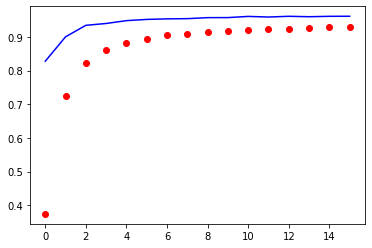

In [38]:
mod(m8)

Epoch 1/100
96/96 [==============================] - 1s 6ms/step - loss: 1.8997 - accuracy: 0.3461 - val_loss: 0.7412 - val_accuracy: 0.8283
Epoch 2/100
96/96 [==============================] - 1s 5ms/step - loss: 1.1292 - accuracy: 0.6386 - val_loss: 0.4400 - val_accuracy: 0.8998
Epoch 3/100
96/96 [==============================] - 0s 5ms/step - loss: 0.8522 - accuracy: 0.7404 - val_loss: 0.3424 - val_accuracy: 0.9154
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 0.7296 - accuracy: 0.7866 - val_loss: 0.3047 - val_accuracy: 0.9233
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.8143 - val_loss: 0.2734 - val_accuracy: 0.9313
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 0.6117 - accuracy: 0.8293 - val_loss: 0.2622 - val_accuracy: 0.9327
Epoch 7/100
96/96 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.8415 - val_loss: 0.2450 - val_accuracy: 0.9395
Epoch 8/100
9

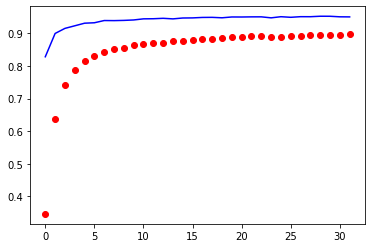

In [39]:
mod(m9)

Epoch 1/100
96/96 [==============================] - 1s 10ms/step - loss: 1.4015 - accuracy: 0.5397 - val_loss: 0.3994 - val_accuracy: 0.8967
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 0.6319 - accuracy: 0.8148 - val_loss: 0.2623 - val_accuracy: 0.9276
Epoch 3/100
96/96 [==============================] - 1s 8ms/step - loss: 0.4714 - accuracy: 0.8700 - val_loss: 0.2059 - val_accuracy: 0.9415
Epoch 4/100
96/96 [==============================] - 1s 9ms/step - loss: 0.3974 - accuracy: 0.8917 - val_loss: 0.1856 - val_accuracy: 0.9482
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3548 - accuracy: 0.9039 - val_loss: 0.1710 - val_accuracy: 0.9524
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3242 - accuracy: 0.9121 - val_loss: 0.1613 - val_accuracy: 0.9559
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3118 - accuracy: 0.9156 - val_loss: 0.1511 - val_accuracy: 0.9575
Epoch 8/100


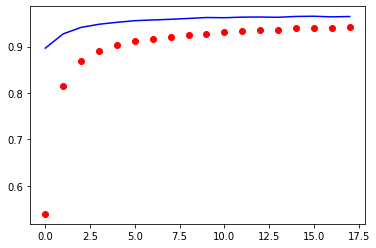

In [40]:
mod(m10)

Epoch 1/50
96/96 [==============================] - 1s 10ms/step - loss: 0.1010 - accuracy: 0.9716 - val_loss: 0.1027 - val_accuracy: 0.9741
Epoch 2/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0908 - accuracy: 0.9762 - val_loss: 0.1041 - val_accuracy: 0.9740
Epoch 3/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0886 - accuracy: 0.9757 - val_loss: 0.1060 - val_accuracy: 0.9744
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9768
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_18 (Activation)   (None, 100)               0       

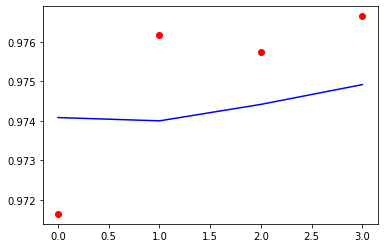

In [41]:
mod2(m5)

Epoch 1/50
96/96 [==============================] - 1s 9ms/step - loss: 0.0893 - accuracy: 0.9763 - val_loss: 0.1024 - val_accuracy: 0.9747
Epoch 2/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0820 - accuracy: 0.9785 - val_loss: 0.1010 - val_accuracy: 0.9751
Epoch 3/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0795 - accuracy: 0.9787 - val_loss: 0.1010 - val_accuracy: 0.9756
Epoch 4/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0767 - accuracy: 0.9790 - val_loss: 0.1076 - val_accuracy: 0.9736
Epoch 5/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0766 - accuracy: 0.9789 - val_loss: 0.1126 - val_accuracy: 0.9746
Epoch 6/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0757 - accuracy: 0.9794 - val_loss: 0.1098 - val_accuracy: 0.9737
Epoch 7/50
96/96 [==============================] - 1s 9ms/step - loss: 0.0713 - accuracy: 0.9805 - val_loss: 0.1051 - val_accuracy: 0.9762
Epoch 8/50
20/20 [==

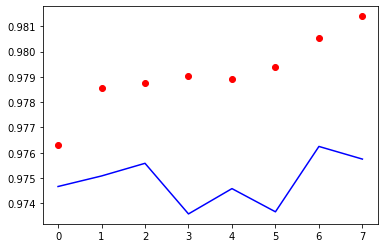

In [44]:
mod3(m5)